<a href="https://colab.research.google.com/github/Anurag17singh/Machine-Learning-and-Deep-Learning/blob/main/EEG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [4]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.6 MB/s eta 0:00:00


In [5]:
import mne
from scipy.signal import welch


In [6]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [7]:
import zipfile; zipfile.ZipFile('/content/eeg-during-mental-arithmetic-tasks-1.0.0.zip', 'r').extractall('sample_data')


In [8]:
# Define the path to the folder containing the data files
data_folder = r'/content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks'

# List all files in the directory
files = os.listdir(data_folder)

# Filter for EDF files (assuming the files are in EDF format)
edf_files = [f for f in files if f.endswith('.edf')]

# Loop through the files and print their information
for edf_file in edf_files:
    file_path = os.path.join(data_folder, edf_file)
    raw = mne.io.read_raw_edf(file_path, preload=True)
    print(f"Information for {edf_file}:")
    print(raw.info)
    print("\n" + "-"*80 + "\n")

Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject20_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Information for Subject20_2.edf:
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>

--------------------------------------------------------------------------------

Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Information for Subject00_2.

In [9]:
# Filter for EDF files (assuming the files are in EDF format)
rest_files = [f for f in files if f.endswith('_1.edf')]
task_files = [f for f in files if f.endswith('_2.edf')]

# Ensure that each rest file has a corresponding task file
assert len(rest_files) == len(task_files), "Mismatch between rest and task files"

# Load the rest and task state data
raw_rest_list = [mne.io.read_raw_edf(os.path.join(data_folder, f), preload=True) for f in rest_files]
raw_task_list = [mne.io.read_raw_edf(os.path.join(data_folder, f), preload=True) for f in task_files]

# Combine the data from all subjects
raw_rest = mne.concatenate_raws(raw_rest_list)
raw_task = mne.concatenate_raws(raw_task_list)

# Apply a bandpass filter to the data
raw_rest.filter(l_freq=1.0, h_freq=50.0)
raw_task.filter(l_freq=1.0, h_freq=50.0)

# Print basic information about the combined data
print(raw_rest.info)
print(raw_task.info)

Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject11_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject22_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject30_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/sample_data/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-mental-arithmetic-tasks/Subject07_1.edf...
EDF file detected
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 36 contiguous segments
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 45.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [10]:

# Define frequency bands
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Calculate PSD for rest and task states using psd method
start_time = time.time()

def compute_psd(data, sfreq, fmin, fmax, n_fft=2048):
    freqs, psds = welch(data, sfreq, nperseg=n_fft)
    # Select frequency range
    idx = np.where(np.logical_and(freqs >= fmin, freqs <= fmax))[0]
    return psds[:, idx], freqs[idx]

sfreq = raw_rest.info['sfreq']
psds_rest, freqs_rest = compute_psd(raw_rest.get_data(), sfreq, fmin=1, fmax=100)
psds_task, freqs_task = compute_psd(raw_task.get_data(), sfreq, fmin=1, fmax=100)

psd_time = time.time()
print(f"Time to calculate PSD: {psd_time - start_time} seconds")

# Function to compute band power
def band_power(psds, freqs, band):
    band_freqs = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.mean(psds[:, band_freqs], axis=1)

# Compute band power for each band
band_powers_rest = {band: band_power(psds_rest, freqs_rest, bands[band]) for band in bands}
band_powers_task = {band: band_power(psds_task, freqs_task, bands[band]) for band in bands}

band_power_time = time.time()
print(f"Time to compute band power: {band_power_time - psd_time} seconds")


Time to calculate PSD: 17.003958225250244 seconds
Time to compute band power: 0.00870966911315918 seconds


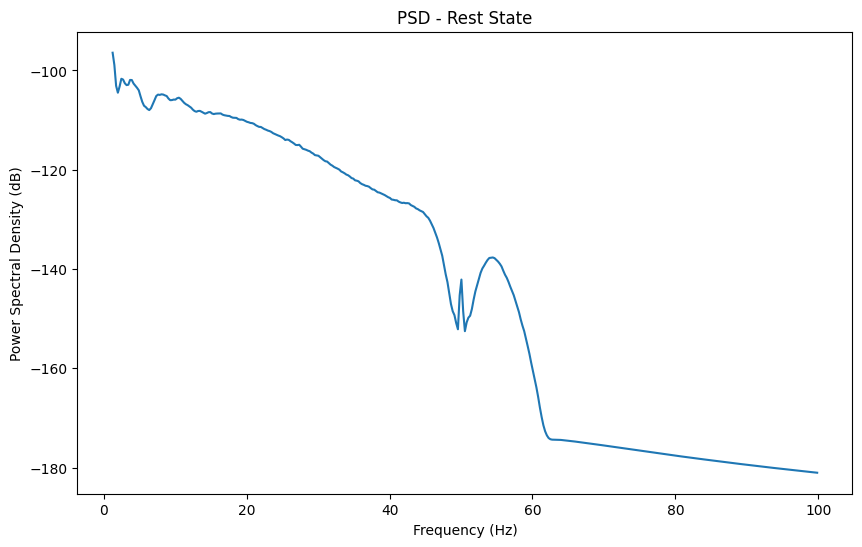

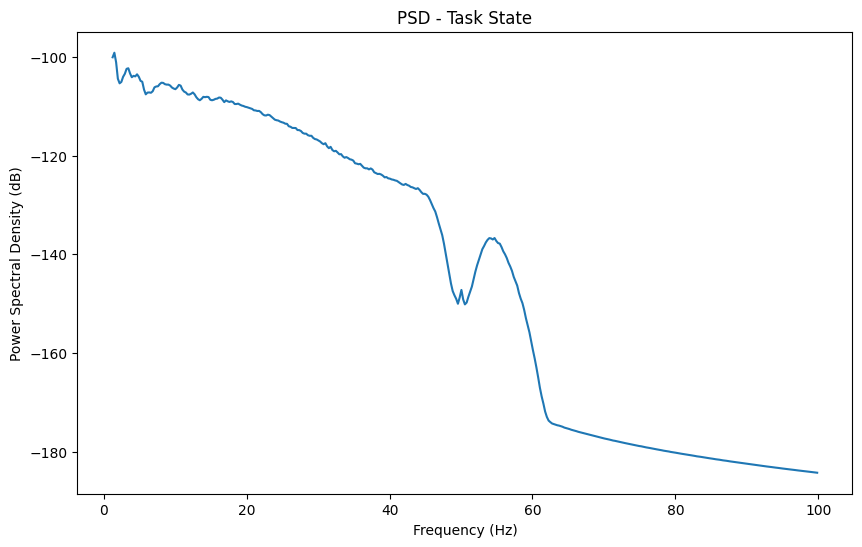

Delta Band:
  Rest: 0.00
  Task: 0.00
  Difference: -0.00

------------------------------

Theta Band:
  Rest: 0.00
  Task: 0.00
  Difference: -0.00

------------------------------

Alpha Band:
  Rest: 0.00
  Task: 0.00
  Difference: -0.00

------------------------------

Beta Band:
  Rest: 0.00
  Task: 0.00
  Difference: 0.00

------------------------------

Gamma Band:
  Rest: 0.00
  Task: 0.00
  Difference: 0.00

------------------------------

Total execution time: 39.82412672042847 seconds


In [11]:

# Function to plot PSD
def plot_psd(psds, freqs, title):
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, 10 * np.log10(psds.mean(axis=0)))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(title)
    plt.show()

# Plot PSDs
plot_psd(psds_rest, freqs_rest, 'PSD - Rest State')
plot_psd(psds_task, freqs_task, 'PSD - Task State')

# Summarize the differences in band power
def summarize_band_power(band_powers_rest, band_powers_task):
    summary = {}
    for band in bands:
        rest_power = np.mean(band_powers_rest[band])
        task_power = np.mean(band_powers_task[band])
        summary[band] = {
            'Rest': rest_power,
            'Task': task_power,
            'Difference': task_power - rest_power
        }
    return summary

band_power_summary = summarize_band_power(band_powers_rest, band_powers_task)

# Print summary
for band, power in band_power_summary.items():
    print(f"{band} Band:")
    print(f"  Rest: {power['Rest']:.2f}")
    print(f"  Task: {power['Task']:.2f}")
    print(f"  Difference: {power['Difference']:.2f}")
    print("\n" + "-"*30 + "\n")

total_time = time.time()
print(f"Total execution time: {total_time - start_time} seconds")


In [12]:
# Feature extraction
# Define function to compute band power
def compute_band_powers(psds, freqs, bands):
    band_powers = {}
    for band, (fmin, fmax) in bands.items():
        band_idx = np.where((freqs >= fmin) & (freqs <= fmax))[0]
        band_power = np.mean(psds[:, band_idx], axis=1)
        band_powers[band] = band_power
    return band_powers

# Compute band powers for rest and task states
band_powers_rest = compute_band_powers(psds_rest, freqs_rest, bands)
band_powers_task = compute_band_powers(psds_task, freqs_task, bands)

# Combine features into a single dataset
import pandas as pd

features_rest = pd.DataFrame(band_powers_rest)
features_task = pd.DataFrame(band_powers_task)
features_rest['label'] = 0  # Rest state
features_task['label'] = 1  # Task state

# Combine both rest and task data
features = pd.concat([features_rest, features_task], axis=0).reset_index(drop=True)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from sklearn.model_selection import train_test_split

# Assuming `features` is a DataFrame with your data
X = features.drop('label', axis=1).values
y = features['label'].values

# Check the shape of X
print(X.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for 1D CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Define a 1D CNN model
model = Sequential()
model.add(Conv1D(16, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Print model summary
model.summary()

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.4f}')


(42, 5)
Epoch 1/50
2/2 [==============================] - 3s 611ms/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.4444
Epoch 2/50
2/2 [==============================] - 0s 116ms/step - loss: 0.6930 - accuracy: 0.5758 - val_loss: 0.6933 - val_accuracy: 0.4444
Epoch 3/50
2/2 [==============================] - 0s 96ms/step - loss: 0.6928 - accuracy: 0.6061 - val_loss: 0.6933 - val_accuracy: 0.4444
Epoch 4/50
2/2 [==============================] - 0s 101ms/step - loss: 0.6932 - accuracy: 0.4848 - val_loss: 0.6934 - val_accuracy: 0.4444
Epoch 5/50
2/2 [==============================] - 0s 102ms/step - loss: 0.6933 - accuracy: 0.5455 - val_loss: 0.6935 - val_accuracy: 0.4444
Epoch 6/50
2/2 [==============================] - 0s 107ms/step - loss: 0.6933 - accuracy: 0.5455 - val_loss: 0.6935 - val_accuracy: 0.4444
Epoch 7/50
2/2 [==============================] - 0s 100ms/step - loss: 0.6921 - accuracy: 0.6364 - val_loss: 0.6935 - val_accuracy: 0.4444
Epoch 8/50
2/

In [24]:
#TSception
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

def TSCeption(input_shape):
    input_layer = Input(input_shape)
    convs = []
    for size in [3, 5, 7]:
        conv = Conv2D(8, (size, 1), activation='relu', padding='same')(input_layer)
        convs.append(conv)
    merged = concatenate(convs, axis=-1)
    model = Model(inputs=input_layer, outputs=merged)
    return model

input_shape = (X_train.shape[1], 1, 1)
tsception = TSCeption(input_shape)
model = Sequential()
model.add(tsception)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)



Epoch 1/50
2/2 [==============================] - 2s 225ms/step - loss: 0.6931 - accuracy: 0.4848 - val_loss: 0.6934 - val_accuracy: 0.4444
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6936 - val_accuracy: 0.4444
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6937 - val_accuracy: 0.4444
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.4444
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6929 - accuracy: 0.5152 - val_loss: 0.6942 - val_accuracy: 0.4444
Epoch 6/50
2/2 [==============================] - 0s 64ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6944 - val_accuracy: 0.4444
Epoch 7/50
2/2 [==============================] - 0s 57ms/step - loss: 0.6929 - accuracy: 0.5152 - val_loss: 0.6944 - val_accuracy: 0.4444
Epoch 8/50
2/2 [==========

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
y_pred_val = (model.predict(X_val) > 0.5).astype("int32")

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score
}

print("Training Metrics:")
for metric_name, metric_func in metrics.items():
    print(f"{metric_name}: {metric_func(y_train, y_pred_train):.4f}")

print("\nValidation Metrics:")
for metric_name, metric_func in metrics.items():
    print(f"{metric_name}: {metric_func(y_val, y_pred_val):.4f}")

1/1 [==============================] - 0s 37ms/step
Training Metrics:
Accuracy: 0.5152
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Validation Metrics:
Accuracy: 0.4444
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
